# Random versus Grid Graph Performance
Here we introduce an additional regular grid graph modelling the way Kilobots would move on a table. We compare the performance over 100 realizations of average consensus of a random graph with this grid graph, both having equal amounts of nodes and edges. In expectation, agents moving at random on the grid graph achieve average consensus more slowly since their mixing is worse.

In [1]:
import math
from operator import add
import matplotlib
import matplotlib.pyplot as plt
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=BIGGER_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

from exp_basic_scalings import run_simulation

%load_ext autoreload
%autoreload 2

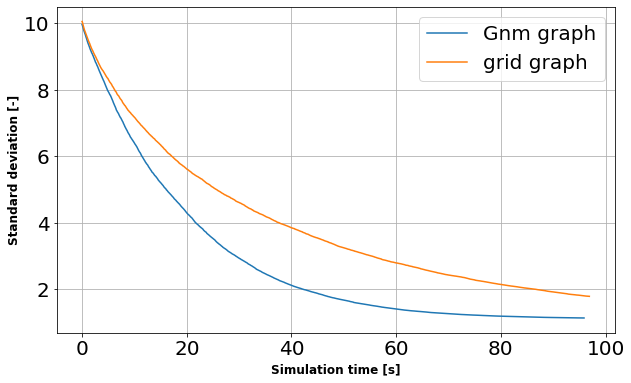

In [2]:
no_agents = 100
mu = 0 # average value
sigma = 10 # gaussian noise
graph_type_list = ['Gnm', 'grid']
graph_size = 900 # n
side_length = math.floor(math.sqrt(graph_size))
edge_number = 2*side_length*(side_length-1) # m
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 100

parameter_type = 'sweep'

fig = plt.figure(figsize=(10,6))
no_sim = 100

for graph_type in graph_type_list:
    (std_rt_val_c, std_rt_t_c) = run_simulation(no_agents, graph_type, graph_size, edge_number, mu, sigma, clock_rate, simulation_time, parameter_type)
    for sim in range(no_sim-1):
        (std_rt_val, std_rt_t) = run_simulation(no_agents, graph_type, graph_size, edge_number, mu, sigma, clock_rate, simulation_time, parameter_type)
        std_rt_val_c = list(map(add, std_rt_val_c, std_rt_val))
        std_rt_t_c = list(map(add, std_rt_t_c, std_rt_t))
    std_rt_val_c = list(map(lambda x: x/no_sim, std_rt_val_c)) 
    std_rt_t_c = list(map(lambda x: x/no_sim, std_rt_t_c)) 
    plt.plot(std_rt_t_c, std_rt_val_c, label='{} graph'.format(graph_type))

plt.xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
plt.ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
plt.legend(loc="upper right")
plt.grid('k')
plt.savefig('./data/graph_types/random_vs_grid.png')
plt.show()
plt.close()